# Assignment 4

## Question 1: The Island of Liers

On a faraway island you are visiting, inhabitants tell the truth two thirds of the time. After
one of them makes a statement, you ask another “was that statement true?” and he says
“yes”. What is the probability that the statement was indeed true? 

Use the Bayes rule to calculate P(Statement = True| “yes”)
$$
    P(X_1 | X_2) = \frac{P(X_2|X_1) P(X_1)}{\sum_x P(X_2|X_1=x)P(X_1=x)}
$$


  <font color="blue"> Assume $R_2$ is the rv equal to $1$ if the second islander says "yes" and $R_1=1$ if the first islander tells the truth.
  For generality, assume the probability of an islander telling the truth is $p$ (we'll replace p with $\frac23$ later).
  We would like to know $P(R_1=1|R_2=1)$
  This problem can be solved using the Bayes rule:
  \begin{equation} 
    \begin{split}
      P(R_1|R_2) &= \frac{P(R_2| R_1)P(R_1)}{P(R_2)}\\
                 &= \frac{P(R_2| R_1)P(R_1)}{P(R_2|R_1=0)P(R_1=0) + P(R_2|R_1=1)P(R_1=1)}
    \end{split}
  \end{equation}
  Note that $P(R_2=1|R_1=1)=p$ and $P(R_2=1|R_1=0)=(1-p)$. 
  Therefore:
  $$
    P(R_1=1|R_2=1) = \frac{p^2}{p^2+(1-p)^2}
  $$
  Replacing with $p=2/3$ we get  $P(R_1|R_2)=.8$.
  This problem can also be solved using tree diagrams as shown in class.

## Question 2: Did the Sun just Explode?

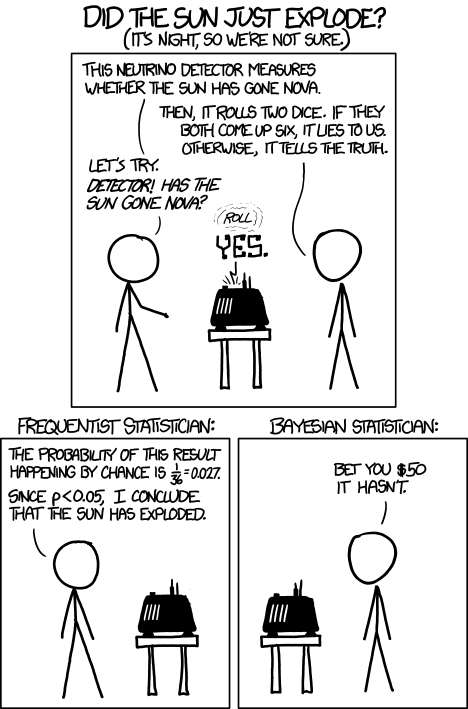

Read the <a href=https://xkcd.com/>XKCD</a> comic above. Assume we don't know the age of our sun, and stars of its kind have a lifespan of about $10^{17}$ seconds.

- Given that the neutrino detector measurement is made over 1 second, calculate the actual odds of the sun going nova given the neutrino detector answered "yes". Use the Bayes Rule.

- Assume the frequentist repeats the measurement again and again. Each time the neutrino detector says “yes”. when is there a $\ge$ 50% chance that the sun has exploded? Solve this numerically.

- __For extra credit__: What is the average loss of the frequentist after 1 measurement? 


<span style="color:blue">
- The probability $P(Nova=1|Answer=1)$ can be obtained by applyting Bayes rule (using A for Answer and N for Nova):
\[
P(N=1|A=1) = \frac{P(A=1|N=1)P(N=1)}{P(A=1|N=1)P(N=1)+P(A=1|N=0)P(N=0)}
\]
Let us now calculate the probabilities involved in this equation.  Assuming that the neutrino requires a second to read the state of the sun, the prior probability of the sun gone nova is $P(Nova=1)=\frac{1}{10\cdot10^{17}}=p$. 

$P(A=1|N=1)= 35/36 = q$, i.e. the chance that the machine does not lie. 

Plugging theses numbers in the equation above and remembering that for a binary rv, $P(X=1)=(1-P(X=0))$, one gets:
$$
P(N=1|A=1) = \frac{q p}{qp+(1-p)(1-q)}=3.5\cdot 10^{-16}
$$

In [5]:
q = 35./36
p = 1e-17
q*p / (q*p + (1-p)*(1-q))

3.499999999999997e-16

<span style="color:blue">
- The dice are rolled multiple times for each experiment. Each time, the machine answers yes. For two answers, we have:
$$
P(N|A_1, A_2) = \frac{P(A_1 A_2 | N) P(N)}{P(A_1 A_2)} = \frac{P(A_1|N) P(A_2|N) p }{P(A_1 A_2)}= \frac{q^2 p }{ (q^2 p + (1-q)^2 (1-p)} 
$$
Where we used (conditional) independence for the last step.
For n rolls, we get:
$$
P(N|A_1,...,A_{12}) = \frac{q^n p}{q^n p+ (1-q)^n (1-p)}
$$
Plugging in the number, we see that after 12 experiments, P(N=1|A_1,...)>.5 </span>

<span style="color:blue">
- Assume X is \$50 is the sun goes nova and -\$50 otherwise. As with the roulette example in assignment 3, we're interesed in the expectation $\mathbb{E}(X)$. The formula is: 
$$
\mathbb{E}(X) = P(X=-50)*(-50)+ P(X=50)*(-50)
$$
Because the bet is won when the sun goes nova, $P(X=50) = 3.5\cdot 10^{-16}$  and $P(X=-50) = 1 - P(X=50) = 1- 3.5^{-16}$. The expectation is a number very close to -50

## Question 3: Uncertainty and Measurements

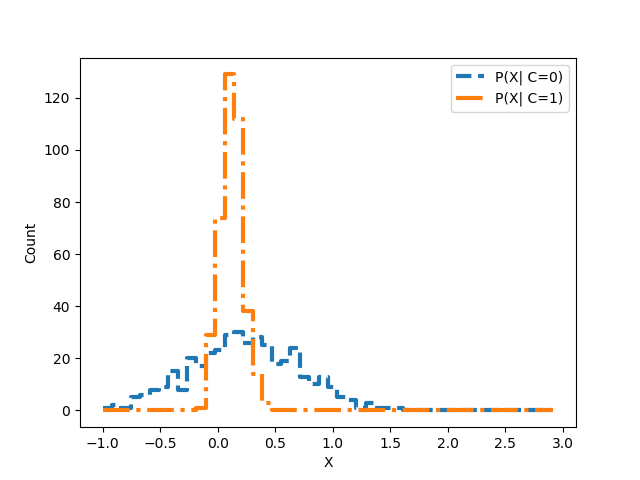

Assume a random variable X whose distribution depends on a class C. (For example X could be hair length, and C could be female vs male). For two different classes C = 0 and C = 1, the above histogram is obtained for random variable X.

- Reading visually from the above histogram, what is approximately the most likely value of X for each class

<span style="color:blue"> X=.1 for both classes

- Assuming $P(X|C=0) \sim N(\mu = .26, \sigma = .27)$ and $P(X|C=1) \sim N(\mu = .20, \sigma = .01)$, calculate using the Bayes rule $P (C = 1|X = .1)$ and $P (C = 1|X = .2)$. Assuming that the distributations $P (C = 1) = .5$. Use the following formula for calculating the Gaussian probabilities:

In [24]:
import scipy.stats
import numpy as np
mu = 0
sigma = .1 
x = 0
scipy.stats.norm.pdf(x, mu, sigma)

3.989422804014327

$$ 
P(C=1|X=.1) = \frac{P(X=.1|C=1) P(C=1)}{P(X=.1|C=1)P(C=1)+P(X=.1|C=0)P(C=0)}
$$
Because P(C=1) = P(C=0), these terms cancel out. The terms P(X=.1|C=1) and P(X=.1|C=0) are calculated using the gaussian distribution's pdf:
$$
p10 = P(X=.1|C=0) = N(\mu = .26, \sigma = .27)(x = .1)
$$
and
$$
p11 = P(X=.1|C=1) = N(\mu = .20, \sigma = .01)(x = .1)
$$
and
$$
p20 = P(X=.1|C=0) = N(\mu = .26, \sigma = .27)(x = .2)
$$
and
$$
p21 = P(X=.1|C=1) = N(\mu = .20, \sigma = .01)(x = .2)
$$

In [30]:
mu = .26
sigma = .27 
x = 0.1
p10 = scipy.stats.norm.pdf(x, mu, sigma)
mu = .20
sigma = .01 
p11 = scipy.stats.norm.pdf(x, mu, sigma)
p11/(p11+p10)

6.20718076192755e-21

In [31]:
mu = .26
sigma = .27 
x = 0.2
p20 = scipy.stats.norm.pdf(x, mu, sigma)
mu = .20
sigma = .01 
p21 = scipy.stats.norm.pdf(x, mu, sigma)
p21/(p21+p20)

0.9651263745138557

- How do you explain that the probabilities are significantly above chance, despite that the two distributions strongly overlap?

<span style="color:blue">  The distribution for P(C|C=1) is much tighter than the distribution for blue. Even though X=.1 is the most likely value for both distributions, the fact that  P(C|C=1)  is mich tighter means that it is much more likely for the data to be produce by class 1.